# 5장. 회귀
## 회귀 소개
    회귀분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법.
    회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
    머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.

#### 회귀의 종류
    회귀 계수가 선형이나 아니냐에 따라 선형 회귀 / 비선형 회귀로 나뉨.
    독립변수의 개수가 한 개인지 여러개인지에 따라 단일 회귀 / 다중 회귀로 나뉨.

#### 지도 학습의 두 가지 유형
    분류 : 이산값(Category값)
    회귀 : 연속값(숫자값)

#### 선형 회귀
    실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식.
    규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것.

+ 일반 선형 회귀 : 예측값과 실제 값의 RSS(잔차의 합의 제곱)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델.
+ 릿지 : 선형 회귀에 L2 규제를 추가한 회귀 모델
+ 라쏘 : 선형 회귀에 L1 규제를 추가한 회귀 모델
+ 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델
+ 로지스틱 회귀 : 분류에 사용되는 선형 모델

## 단순 선형 회귀를 통한 회귀 이해
    단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀
    RSS : 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 W변수(회귀 계수)가 중심 변수임.
        = 비용 함수, 손실 함수
    머신러닝 기반 회귀 : RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것

## 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
    경사 하강법 : '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식.
    "어떻게 하면 오류(RSS)가 작아지는 방향으로 W(회귀계수, 파라미터) 값을 보정할 수 있을까?"
    최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w(최적의 파라미터)를 반환함.

#### 지금까지 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현해보기. 간단한 회귀식인 y=4X+6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀 계수 w1을 4에 가까운 값으로, w0를 6에 가까운 값으로 도출하자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

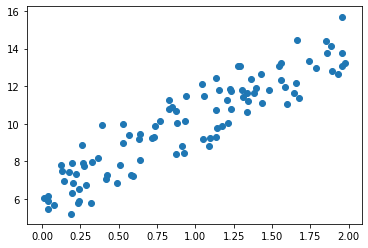

In [2]:
np.random.seed(0)
# y = 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X=2*np.random.rand(100,1) # (100개를 0부터 1까지) 거기에 *2를 해서 0부터 2까지. 0부터 1사이의 균일 분포에서 난수 matrix array 생성
y=6+4*X+np.random.randn(100,1) # 가우시안 표준 정규 분포에서 난수 matrix array 생성해서 노이즈를 만들어줌.

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [3]:
# 데이터는 y=4X+6을 중심으로 무작위로 퍼져있다. 이제 경사 하강법을 이용해 y=w1X+w0에 해당하는 w1과 w0를 구해보자.
# 경사 하강법을 이용한 단순 선형 회귀는 w1과 w0을 모두 0으로 초기화한 뒤 특정 횟수만큼 반복하면서 w1과 w0를 업데이트함.

In [4]:
# 먼저 w0와 w1을 업데이트할 값을 구하는 함수인 get_weight_update() 생성.

In [6]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    # 예측 배열 계산하고 예측 실제 값의 차이 계산
    y_pred=np.dot(X, w1.T)+w0 # np.dot으로 X 행렬과 w1.T 행렬의 원소들을 내적으로 곱함. 
                            # .T는 전치행렬. m X n을 n X m으로. 0 x 1로 된 w1을 1 x 0으로 전치.
    diff=y-y_pred # diff=RSS(w0, w1) 오차
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [7]:
# get_weight_updates 함수를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수 생성

In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화.
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1, w0

In [10]:
# gradient_descent_steps()를 호출해 w1과 w0을 구해보자. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는
# get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해보기.

In [11]:
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [12]:
w1, w0=gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


#### => 실제 선형식인 y=4X+6과 유사하게 w1은 4.022, w0은 6.162 도출. 예측 오류 비용은 약 0.9935.

In [13]:
# 앞에서 구한 y_pred에 기반해 회귀선 그려보기.

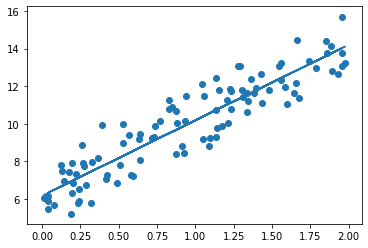

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred)

#### 확률적 경사 하강법
    경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트하기 때문에 수행 기간이 매우 오래걸림.
    확률적 경사 하강법은 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장함.
    따라서 대용량 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용 함수를 도출함.

In [15]:
# 미니 배치 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현해보자.

In [16]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1, w0

In [17]:
# 이렇게 만들어진 stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용을 계산해보자.

In [19]:
w1, w0=stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


#### => 경사 하강법으로 구한 값과 큰 차이가 없음. 따라서 큰 데이터를 처리할 경우 경사하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법 이용.

#### 피처가 여러개인 경우도 유사하게 도출 가능함.
    피처가 M개 (X1, X2...Xm)있다면 그에 따른 회귀계수도 M+1(1개는 w0)개로 도출됨. 

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
### LinearRegression 클래스 - Ordinary Least Squares
    : 예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스.
    fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장.

In [ ]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True,
                                           n_jobs=1)
# fit_intercept=True : 절편을 쓸지 안쓸지
# normalize=False : 데이터 정규화

#### 다중 공선성
    피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이를 다중공선성 문제라 함.
    일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용.
    또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려 가능.

### 회귀 평가 지표
    회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.
    실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여 오류가 상쇄됨.
    때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구함.

#### 회귀 성능 평가 지표 (p.300)
+ MAE : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것
+ MSE : 실제 값과 예측값의 차이를 제곱해 평균한 것
+ RMSE (작을수록 좋다.) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것.
+ R제곱 : 실제 값의 분산 대비 예측 값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

#### => But, 사이킷런에선 RMSE를 제공하지 않기 때문에 RMSE를 구하기 위해선 MSE에 제곱근을 씌워 계산하는 함수를 직접 만들어야 함.

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [22]:
# boston 데이터 세트 로드
boston=load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### => NULL 없고 모두 float 형이다.
    다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지 시각화해보자.
    총 8개의 칼럼에 대해 값이 증가할수록 PRICE가 어떻게 변화하는지 확인.
    시본의 regplot() : X, Y축 값의 산점도와 함께 선형 회귀 직선 그려줌.
    matplotlib.supblots() : 각 ax마다 칼럼과 PRICE의 관계 표현, 여러개의 그래프를 한번에 표현.
        인자로 임력하는 ncols는 열 방향으로 위치할 그래프 개수, nrows는 행 방향으로 위치할 그래프 개수.
        ncols=4, nrows=2면 2개의 행과 4개의 열을 가진 총 8개의 그래프를 그릴 수 있음.

0
0
0
0
1
1
1
1


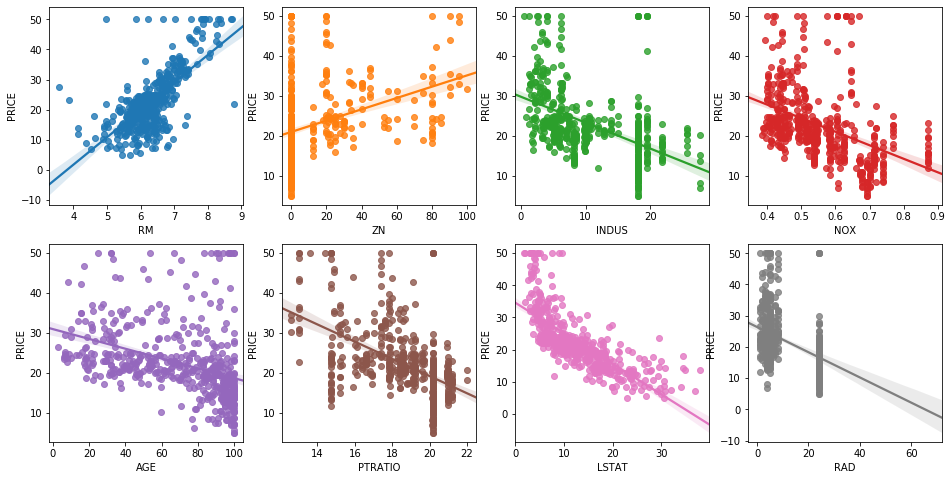

In [24]:
# 2개의 행과 4개의 열을 가진 subplots을 이용. axs는 4 X 2개의 ax를 가짐.
fig, axs=plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features): # enumerate() : 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 돌려준다.
    row=int(i/4) # int화 했기 때문에 0/4=0, 1/4=0, 2/4=0, 3/4=0
                # 4/4=1, 5/4=1, 6/4=1, 7/4=1 => 그래프의 2 X 4 행렬의 첫 번째 행, 두 번째 행으로 네 개씩 들어가게 됨.
    print(row)
    col=i%4 # 0%4=0, 4%4=0 식으로 세워지게 됨.
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col]) # [row][col] 자리에 그래프가 들어가게 됨.

#### => RM과 LSTAT의 PRICE 영향도가 가장 두드러짐. 
    RM(방 개수)가 많을수록 집값이 올라가고, LSTAT(하위 계층 비율)이 내려갈수록 집값이 올라감.

In [25]:
# 이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3,
                                                 random_state=156)

In [27]:
# 선형 회귀 OLS로 학습/예측/평가 수행
# 회귀 모형 평가 지표인 MSE, RMSE 값 구하기
lr=LinearRegression()
lr.fit(X_train, y_train) # 학습
y_preds=lr.predict(X_test) # 예측
mse=mean_squared_error(y_test, y_preds) # MSE 값 구하기
rmse=np.sqrt(mse) # RMSE 값 구하기

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # R 제곱

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [28]:
# 절편과 회귀 계수 구하기
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


#### => coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해보자.

In [29]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼 명에 유의
coeff=pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

#### => RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 -값이 너무 큼. 최적화를 수행하며 피처 coefficients의 변화도 같이 봐보자.
    cross_val_score()를 이용해 교차검증으로 MSE 와 RMSE 측정해보자.
    RMSE를 제공 안하므로 MSE 수치 결과를 RMSE로 변환해야 함.
    cross_val_score()인자로 scoring='neg_mean_squared_erorr'를 지정하면 음수값으로 반환됨. 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데, 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이니까 부합시키기 위해 -1을 곱하며 음수로 변환해야 제대로 평가 가능.

In [30]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

In [31]:
# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error"로 반환된 값은 모두 음수)
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [ ]:
## 다항 회귀와 과(대_적합/과소적합 이해